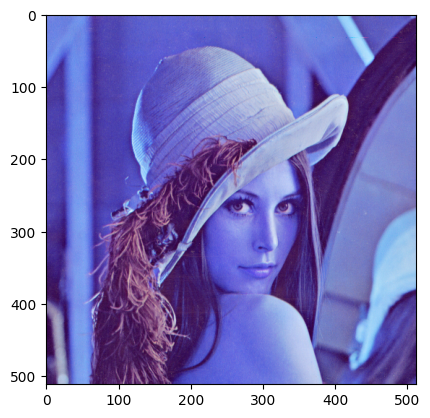

In [1]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('image.png')

plt.imshow(image)


In [2]:
image.shape

(512, 512, 3)

why?!

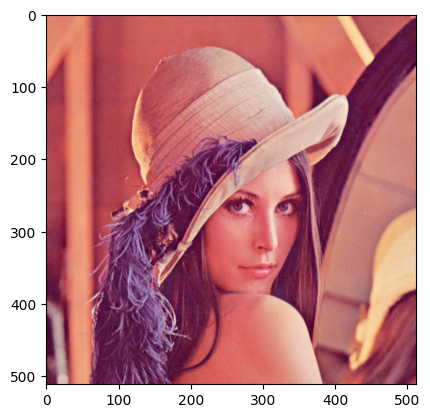

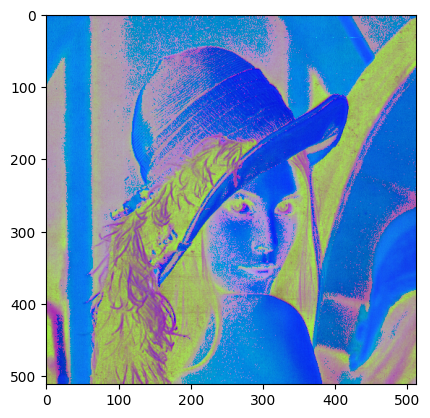

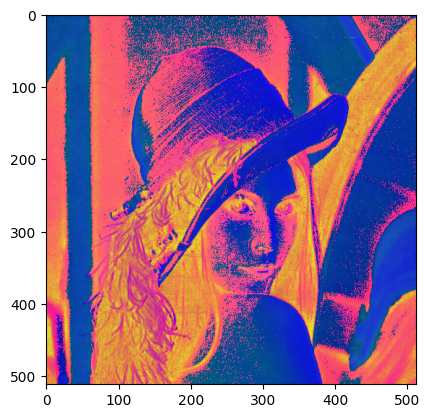

In [4]:
import numpy as np
rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
hsv = cv2.cvtColor(image,cv2.COLOR_BGR2HSV)

def bgr_to_hsi(bgr):
    bgr = bgr.astype(np.float32) / 255.0
    B, G, R = bgr[:,:,0], bgr[:,:,1], bgr[:,:,2]

    # Intensity
    I = (R + G + B) / 3.0

    # Saturation
    min_rgb = np.minimum(np.minimum(R, G), B)
    S = 1 - (3 / (R + G + B + 1e-6)) * min_rgb

    # Hue
    num = 0.5 * ((R - G) + (R - B))
    den = np.sqrt((R - G)**2 + (R - B)*(G - B)) + 1e-6
    theta = np.arccos(num / den)

    H = theta.copy()
    H[B > G] = 2 * np.pi - H[B > G]   # if B > G

    H = H / (2 * np.pi)  # normalize 0–1

    # Stack back into an image
    HSI = cv2.merge([H, S, I])
    return HSI

hsi = bgr_to_hsi(image)

plt.imshow(rgb)
plt.show()
plt.imshow(hsv)
plt.show()
plt.imshow(hsi)
plt.show()

In [5]:
hsi.shape

(512, 512, 3)

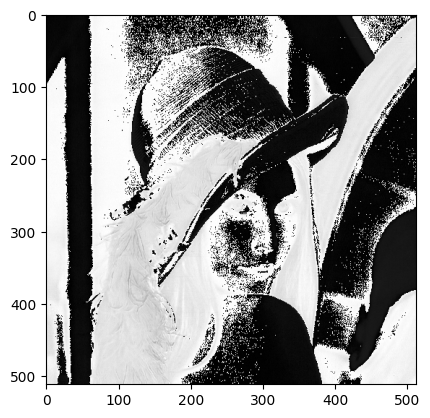

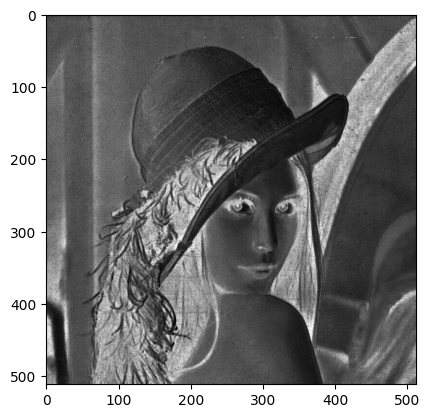

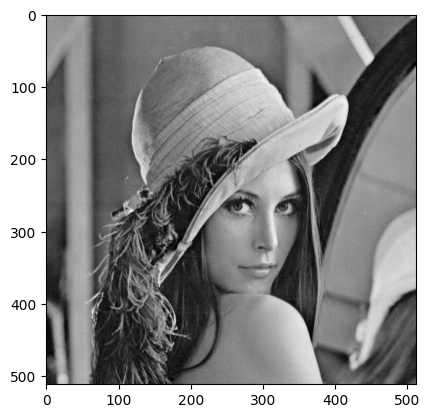

In [7]:
for i in range(3):
    plt.imshow(hsi[:,:,i],cmap='gray')
    plt.show()

In [8]:
hsv.shape

(512, 512, 3)

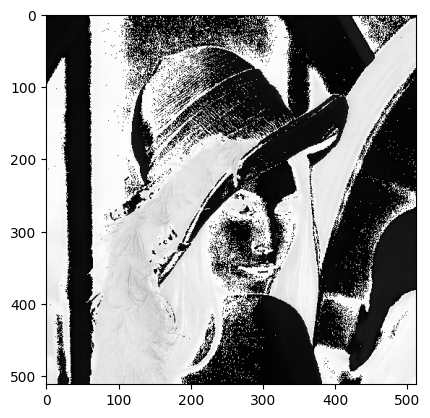

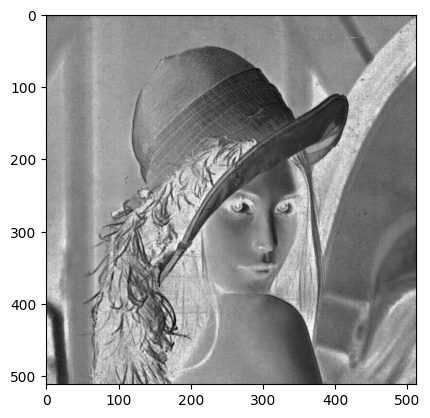

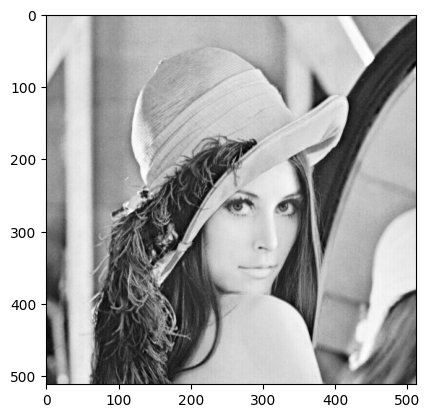

In [9]:
for i in range(3):
    plt.imshow(hsv[:,:,i],cmap='gray')
    plt.show()

In [10]:
# Web-safe RGB levels
levels = np.array([0, 51, 102, 153, 204, 255])

# Function to convert one channel to safe values
def to_safe_channel(channel):
    channel = channel.astype(np.float32)
    idx = np.abs(channel[..., None] - levels).argmin(axis=2)
    return levels[idx].astype(np.uint8)

R_safe = to_safe_channel(rgb[:,:,0])
G_safe = to_safe_channel(rgb[:,:,1])
B_safe = to_safe_channel(rgb[:,:,2])

safe_rgb = cv2.merge([R_safe, G_safe, B_safe])

In [11]:
safe_rgb.shape

(512, 512, 3)

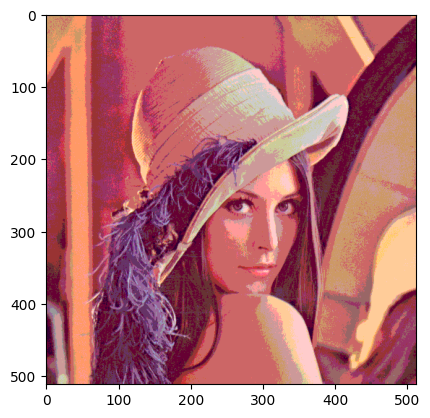

In [12]:
plt.imshow(safe_rgb)

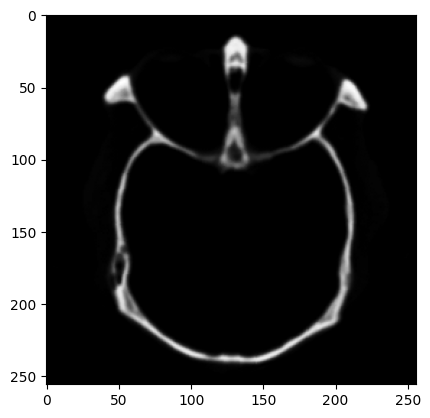

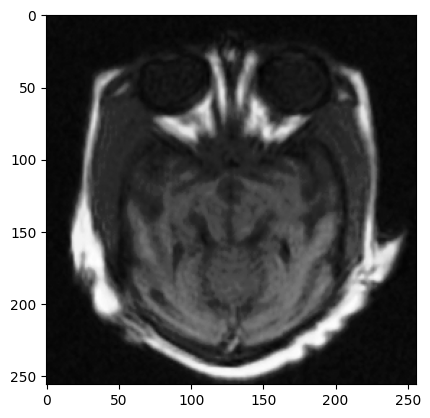

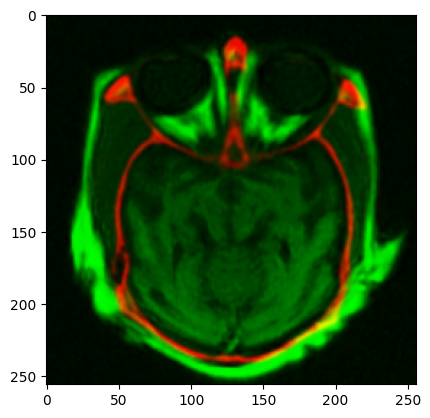

In [4]:
import numpy as np
def combine_image(image,image_2):
    combined = np.zeros((image.shape[0], image.shape[1], 3), dtype=np.uint8)
    combined[..., 2] = 0
    combined[..., 1] = image_2
    combined[..., 0] = image 
    return combined

image_1 = cv2.imread(f"c01_1.tif",cv2.IMREAD_GRAYSCALE)
plt.imshow(image_1,cmap='gray')
plt.show()

image_2 = cv2.imread(f"c01_2.tif",cv2.IMREAD_GRAYSCALE)
plt.imshow(image_2,cmap='gray')
plt.show()
combine=combine_image(image_1,image_2)

plt.imshow(combine)
plt.show()

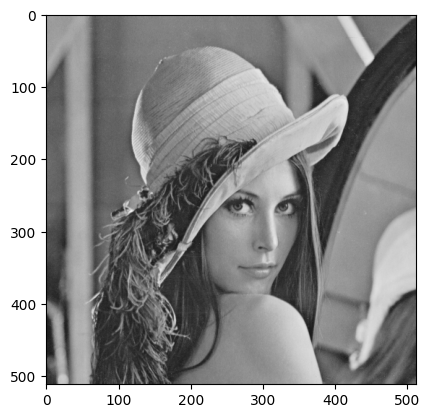

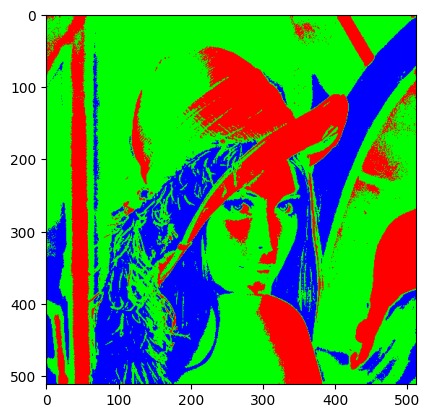

In [21]:
import cv2
import numpy as np

img = cv2.imread("image.png", cv2.IMREAD_GRAYSCALE)

color_img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

slices = [
    ((0, 80),   (255,   0,   0)),   # blue
    ((80, 160), (  0, 255,   0)),   # green
    ((160,255), (  0,   0, 255)),   # red
]

output = color_img.copy()

for (low, high), color in slices:
    mask = cv2.inRange(img, low, high)
    output[mask > 0] = color

img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
output = cv2.cvtColor(output,cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.show()

plt.imshow(output)
plt.show()


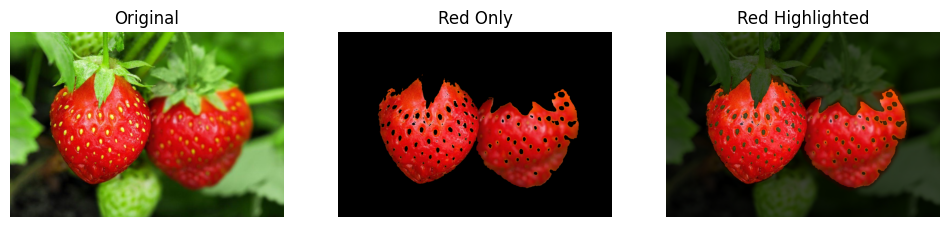

In [22]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("fruit.jpg")
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

lower_red1 = np.array([0, 100, 100])
upper_red1 = np.array([10, 255, 255])
lower_red2 = np.array([160, 100, 100])
upper_red2 = np.array([179, 255, 255])

mask1 = cv2.inRange(hsv, lower_red1, upper_red1)
mask2 = cv2.inRange(hsv, lower_red2, upper_red2)
red_mask = cv2.bitwise_or(mask1, mask2)

red_only = cv2.bitwise_and(img, img, mask=red_mask)
dimmed = (img * 0.3).astype(np.uint8)
highlighted = dimmed.copy()
highlighted[red_mask > 0] = img[red_mask > 0]

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
red_only_rgb = cv2.cvtColor(red_only, cv2.COLOR_BGR2RGB)
highlighted_rgb = cv2.cvtColor(highlighted, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12,6))
plt.subplot(1,3,1)
plt.imshow(img_rgb)
plt.title("Original")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(red_only_rgb)
plt.title("Red Only")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(highlighted_rgb)
plt.title("Red Highlighted")
plt.axis("off")

plt.show()


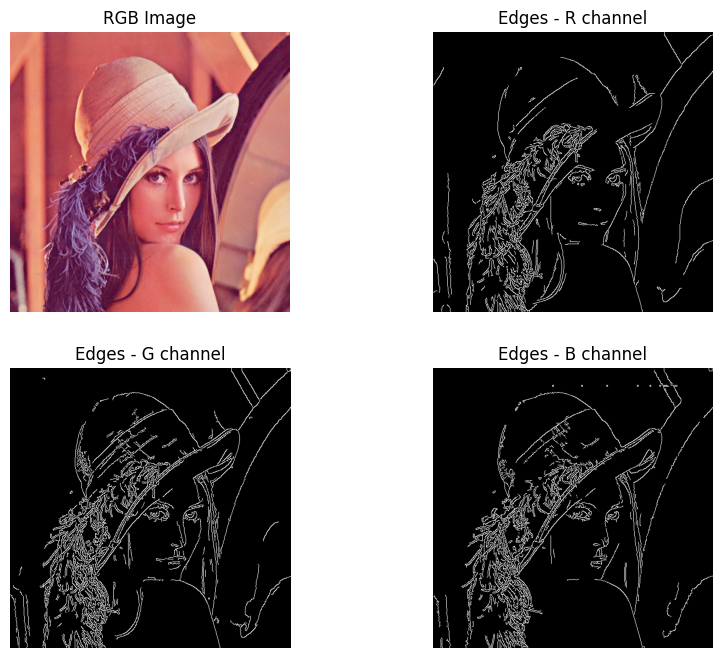

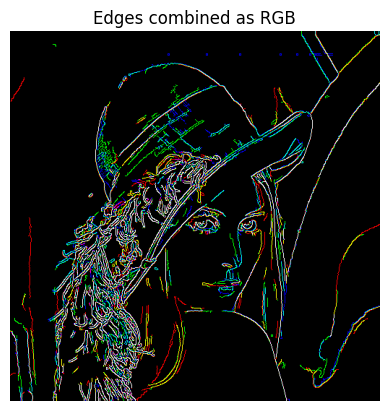

In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img_bgr = cv2.imread("image.png")
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

r, g, b = cv2.split(img_rgb)

edges_r = cv2.Canny(r, 100, 200)
edges_g = cv2.Canny(g, 100, 200)
edges_b = cv2.Canny(b, 100, 200)

edges_rgb = cv2.merge([edges_r, edges_g, edges_b])

plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
plt.imshow(img_rgb)
plt.title("RGB Image")
plt.axis("off")

plt.subplot(2, 2, 2)
plt.imshow(edges_r, cmap="gray")
plt.title("Edges - R channel")
plt.axis("off")

plt.subplot(2, 2, 3)
plt.imshow(edges_g, cmap="gray")
plt.title("Edges - G channel")
plt.axis("off")

plt.subplot(2, 2, 4)
plt.imshow(edges_b, cmap="gray")
plt.title("Edges - B channel")
plt.axis("off")

plt.figure()
plt.imshow(edges_rgb)
plt.title("Edges combined as RGB")
plt.axis("off")

plt.show()


The **Canny Edge Detector** is a *multi-stage* algorithm.
It does **not** simply look for changes in intensity — it performs a series of precise filtering and thresholding steps.

Below is the full pipeline in the exact order used in computer vision libraries (including OpenCV).

---

# ✅ **How Canny Edge Detection Works (Step-by-Step)**

## **1. Noise Reduction (Gaussian Blur)**

Canny starts by smoothing the image:

[
I_{smooth} = I * G_{\sigma}
]

This removes noise so small fluctuations don’t become false edges.

---

## **2. Compute Intensity Gradient (Sobel Filters)**

Canny finds how fast the intensity changes in the **x** and **y** directions:

[
G_x = I * S_x \quad \text{and} \quad G_y = I * S_y
]

Where (S_x) and (S_y) are Sobel kernels.

Then magnitude and angle:

[
G = \sqrt{G_x^2 + G_y^2}
]

[
\theta = \arctan\left(\frac{G_y}{G_x}\right)
]

---

## **3. Non-Maximum Suppression (NMS)**

This thins thick edges.
For each pixel:

* Look at the two neighbors *along the gradient direction*
* If the pixel is **not** the maximum → suppress to **0**

This produces a one-pixel-wide edge.

---

## **4. Double Thresholding**

Canny uses two thresholds:

* **High threshold**: strong, real edges
* **Low threshold**: weak edges (could be noise or edge continuation)

Pixels are classified:

| Pixel intensity    | Classification     |
| ------------------ | ------------------ |
| ≥ High threshold   | Strong edge        |
| Between Low & High | Weak edge          |
| < Low              | Non-edge (removed) |

---

## **5. Hysteresis Edge Tracking**

Weak edges are kept **only if** they touch a strong edge.
Otherwise, they are removed.

This final step eliminates isolated noise responses.



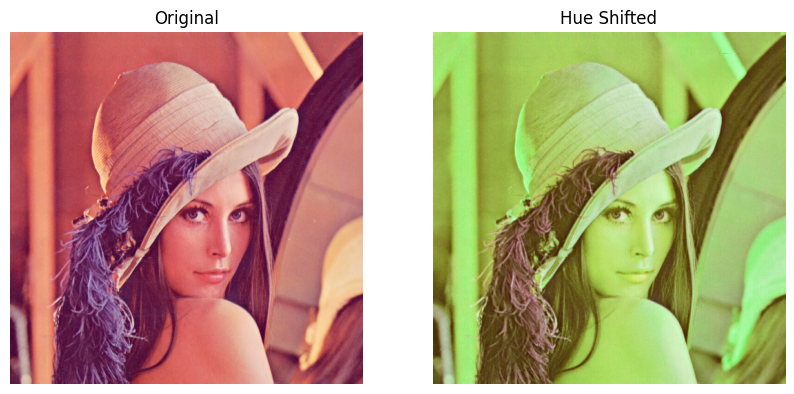

In [24]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

hsv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV)

h, s, v = cv2.split(hsv)

shift_amount = 40  # 0–179 (HSV hue range in OpenCV)

h_shifted = (h.astype(np.int16) + shift_amount) % 180
h_shifted = h_shifted.astype(np.uint8)

hsv_shifted = cv2.merge([h_shifted, s, v])

img_shifted = cv2.cvtColor(hsv_shifted, cv2.COLOR_HSV2RGB)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(img_rgb)
plt.title("Original")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(img_shifted)
plt.title("Hue Shifted")
plt.axis("off")

plt.show()

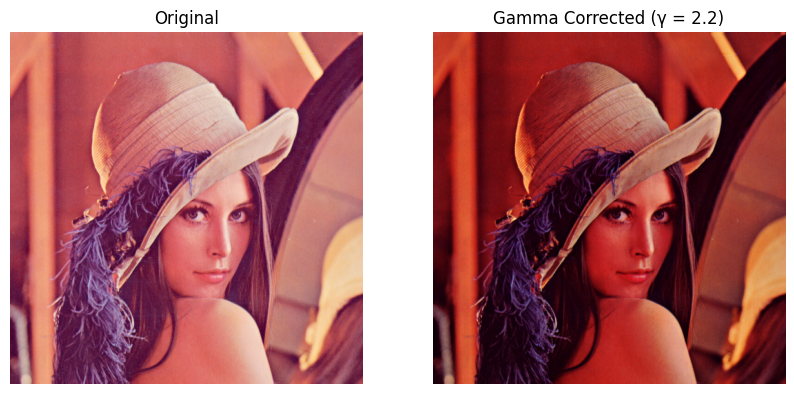

In [25]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img_bgr = cv2.imread("image.png")
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

gamma = 2.2   # change this value ( <1 = brighten , >1 = darken )

img_float = img_rgb.astype(np.float32) / 255.0
corrected = np.power(img_float, gamma)
corrected = (corrected * 255).astype(np.uint8)

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(img_rgb)
plt.title("Original")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(corrected)
plt.title(f"Gamma Corrected (γ = {gamma})")
plt.axis("off")

plt.show()


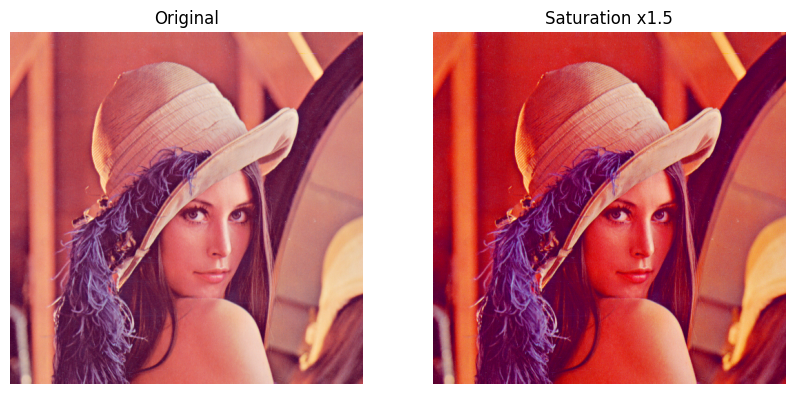

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img_bgr = cv2.imread("image.png")
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

hsv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV)
h, s, v = cv2.split(hsv)

sat_factor = 1.5   

s = np.clip(s.astype(np.float32) * sat_factor, 0, 255).astype(np.uint8)

hsv_adjusted = cv2.merge([h, s, v])
img_sat = cv2.cvtColor(hsv_adjusted, cv2.COLOR_HSV2RGB)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(img_rgb)
plt.title("Original")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(img_sat)
plt.title(f"Saturation x{sat_factor}")
plt.axis("off")

plt.show()


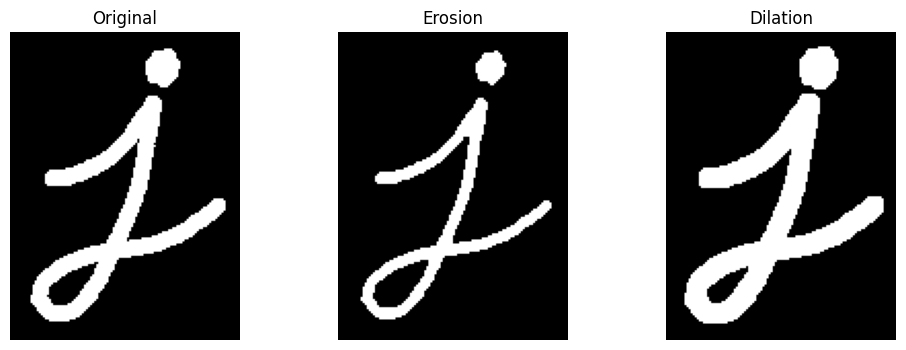

In [27]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("image_erosion.png", cv2.IMREAD_GRAYSCALE)

kernel = np.ones((3,3), np.uint8)

eroded = cv2.erode(img, kernel, iterations=1)
dilated = cv2.dilate(img, kernel, iterations=1)

plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.imshow(img, cmap="gray")
plt.title("Original")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(eroded, cmap="gray")
plt.title("Erosion")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(dilated, cmap="gray")
plt.title("Dilation")
plt.axis("off")

plt.show()


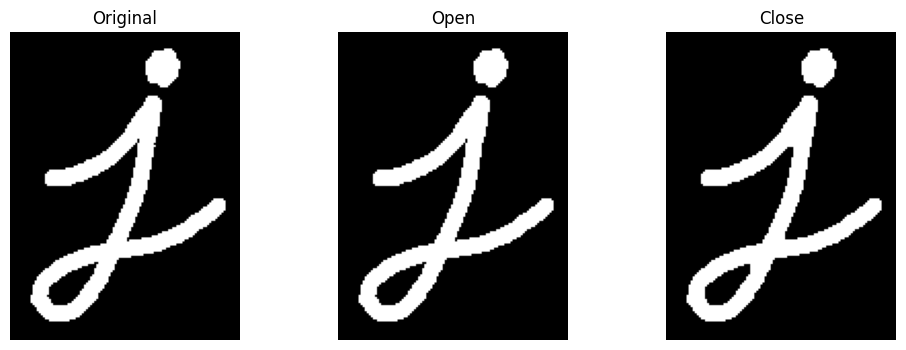

In [ ]:
def open_image(img):
    kernel = np.ones((3,3), np.uint8)
    eroded = cv2.erode(img, kernel, iterations=1)
    return cv2.dilate(eroded, kernel, iterations=1)

def close_image(img):
    kernel = np.ones((3,3), np.uint8)
    dilate = cv2.dilate(img, kernel, iterations=1)
    return cv2.erode(dilate, kernel, iterations=1)

open = open_image(img)
close = close_image(img)
plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.imshow(img, cmap="gray")
plt.title("Original")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(open, cmap="gray")
plt.title("Open")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(close, cmap="gray")
plt.title("Close")
plt.axis("off")

plt.show()

In [ ]:
dilate(eroded, kernel, iterations=1)

def close_image(img):
    kernel = np.ones((3,3), np.uint8)
    dilate = cv2.dilate(img, kernel, iterations=1)
    return cv2.erode(dilate, kernel, iterations=1)

open = open_image(img)
close = close_image(img)
plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.imshow(img, cmap="gray")
plt.title("Original")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(open, cmap="gray")
plt.title("Open")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(close, cmap="gray")
plt.title("Close")
plt.axis("off")

plt.show()

![image copy.png](<attachment:image copy.png>)
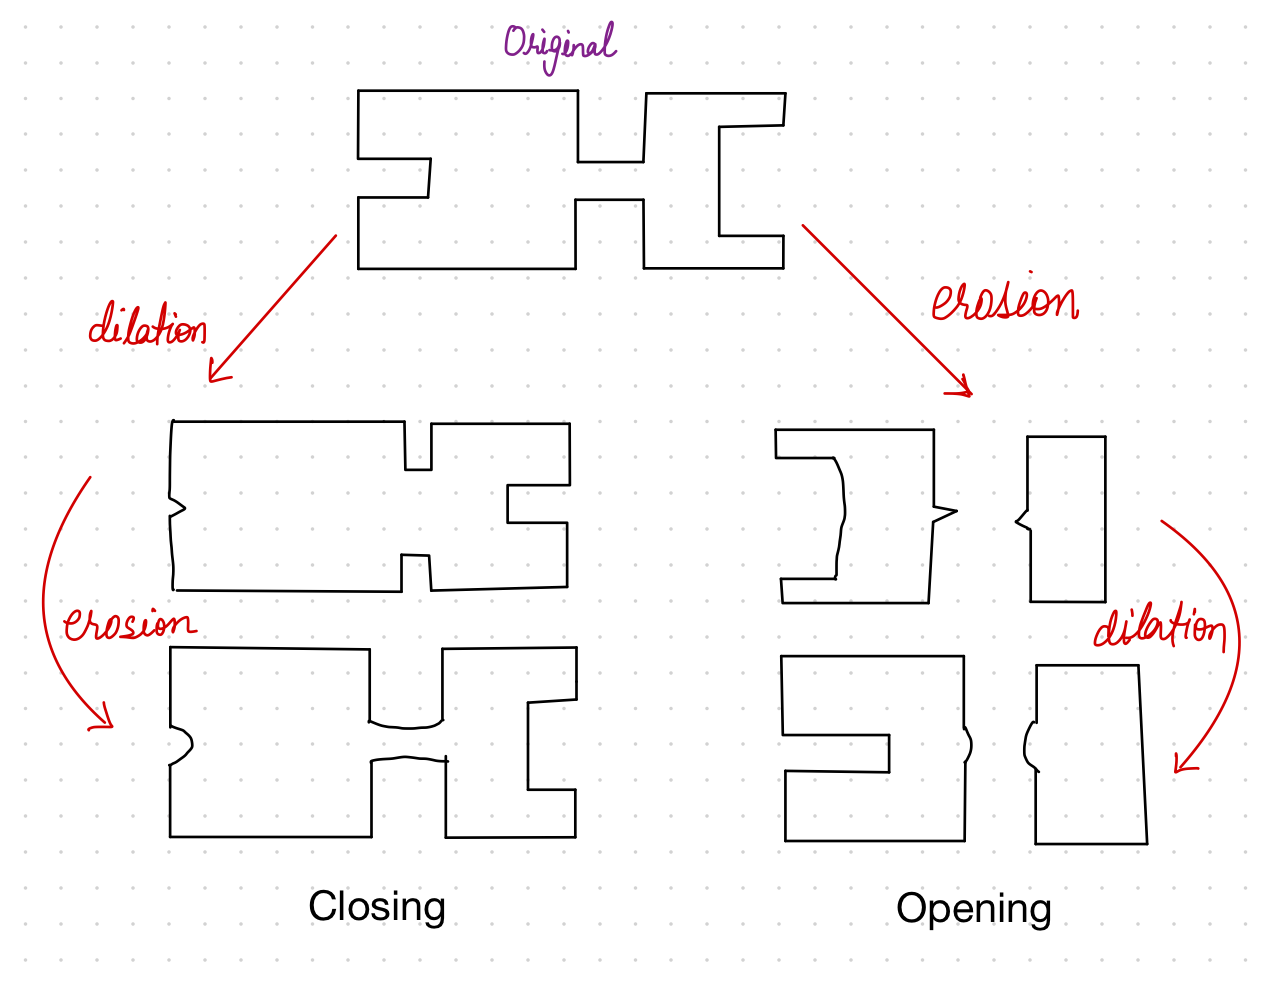